In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.datasets import make_classification

In [4]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, 
                          n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=30)

In [5]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [6]:
len(X)

100

In [7]:
len(y)

100

In [8]:
# now joining these two into a single dataframe

In [9]:
y = y.reshape(-1,1)

In [10]:
df = np.concatenate([X,y], axis=1)

In [11]:
df = pd.DataFrame(df)
df.rename(columns={0:'feature1', 1:'feature2', 2:'target'}, inplace=True)

In [12]:
df

,feature1,feature2,target
0,0.823215,-0.116976,1.0
1,0.375148,-0.731152,1.0
2,0.269478,-0.708106,1.0
3,-4.987449,-2.011992,0.0
4,0.423128,1.634932,1.0
...,...,...,...
95,-5.519911,0.661988,0.0
96,-4.932582,0.071533,0.0
97,-4.856931,0.323236,0.0
98,1.460234,-0.345742,1.0


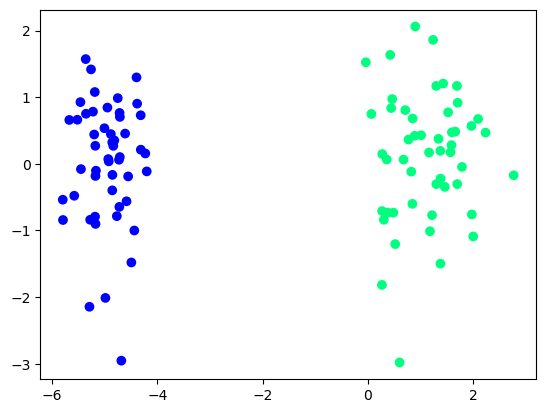

In [13]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df.iloc[:,2], cmap='winter');

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression()

lr.fit(df.iloc[:,0:2], df.iloc[:,-1])

LogisticRegression()

In [16]:
lr.intercept_, lr.coef_

(array([3.54861952]), array([[1.77298737, 0.0122258 ]]))

In [17]:
lr.coef_[0][0]

1.7729873687722042

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
X1, y1 = make_classification(n_samples=1500, n_features=2, n_informative=1, n_redundant=0, 
                          n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=30)

In [20]:
y1 = y1.reshape(-1,1)
y1

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [21]:
df1 = np.concatenate([X1,y1], axis=1)

In [22]:
df1

array([[ 0.35398259,  0.83014195,  1.        ],
       [ 1.27607265,  0.65865037,  1.        ],
       [-0.21864659, -5.13001906,  0.        ],
       ...,
       [-0.75737937, -5.03387754,  0.        ],
       [ 1.43453922, -5.20735172,  0.        ],
       [ 0.60411497,  1.25270645,  1.        ]])

In [23]:
df1 = pd.DataFrame(df1)

In [24]:
df1

,0,1,2
0,0.353983,0.830142,1.0
1,1.276073,0.658650,1.0
2,-0.218647,-5.130019,0.0
3,0.673042,0.414146,1.0
4,0.408727,-5.081356,0.0
...,...,...,...
1495,-1.698007,1.132990,1.0
1496,-0.495010,1.802132,1.0
1497,-0.757379,-5.033878,0.0
1498,1.434539,-5.207352,0.0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_tr, X_te, y_tr, y_te = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [27]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [28]:
X_tr_trans = poly.fit_transform(X_tr)
X_te_trans = poly.transform(X_te)

In [29]:
X_tr_trans.shape

(1200, 6)

In [30]:
X_tr.shape

(1200, 2)

In [31]:
# the shape is changed for X_train data, earlier it was 2 columns and now there are 6 columns

In [32]:
# let's dive into it like how it was changed

# so if I make it a degree 2 

# this means that my column can we rewrite as y = β0 + β1 * x + β2 * x ^ 2

In [33]:
# this means that in place of one column now we will be having 3 columns

### if degree is 2 and also features are two

In [39]:
# y = b0 + b1*x1 + b2*x2 + b3*x3 + b4*x1^2 + b5*x2^2 + b6*x3^2 + b7*x1*x2 + b8*x1*x3 + b9*x2*x3 + E

#### to test it even better let's make it a dataframe and then see if we have a column whose values are just 1's

In [34]:
X_tr_trans2 = pd.DataFrame(X_tr_trans)

In [35]:
X_tr_trans2

,0,1,2,3,4,5
0,1.0,0.444985,0.911094,0.198012,0.405423,0.830093
1,1.0,0.711928,2.589346,0.506841,1.843427,6.704714
2,1.0,1.193193,-5.195500,1.423710,-6.199236,26.993220
3,1.0,-1.106790,0.470645,1.224984,-0.520905,0.221507
4,1.0,0.428315,-5.122490,0.183454,-2.194038,26.239902
...,...,...,...,...,...,...
1195,1.0,-0.098822,0.550793,0.009766,-0.054431,0.303373
1196,1.0,-0.391448,0.509708,0.153231,-0.199524,0.259802
1197,1.0,0.360275,-5.041010,0.129798,-1.816150,25.411779
1198,1.0,0.130636,-5.040117,0.017066,-0.658420,25.402775


In [36]:
X_te_trans2 = pd.DataFrame(X_te_trans)

In [38]:
X_te_trans2

,0,1,2,3,4,5
0,1.0,1.528765,-5.068335,2.337123,-7.748294,25.688015
1,1.0,0.731388,-5.176022,0.534929,-3.785682,26.791201
2,1.0,0.501856,-5.157266,0.251859,-2.588203,26.597392
3,1.0,1.099847,2.283609,1.209664,2.511621,5.214871
4,1.0,0.821332,0.982544,0.674586,0.806994,0.965392
...,...,...,...,...,...,...
295,1.0,0.447770,1.178032,0.200498,0.527488,1.387760
296,1.0,-0.586824,-5.075116,0.344362,2.978197,25.756798
297,1.0,-0.815177,0.704940,0.664513,-0.574651,0.496941
298,1.0,0.358050,-5.090000,0.128200,-1.822472,25.908096


### Here when we set include_bias = False, this means that we setting values of b0 = 0, which is not correct in most cases and we should always include a bias term in our algorithm

In [45]:
poly2 = PolynomialFeatures(degree=3, include_bias=False)

In [46]:
X_tr_trans3 = poly2.fit_transform(X_tr)

In [47]:
X_tr_trans3 = pd.DataFrame(X_tr_trans3)

In [48]:
X_tr_trans3

,0,1,2,3,4,5,6,7,8
0,0.444985,0.911094,0.198012,0.405423,0.830093,0.088112,0.180407,0.369379,0.756293
1,0.711928,2.589346,0.506841,1.843427,6.704714,0.360834,1.312387,4.773271,17.360825
2,1.193193,-5.195500,1.423710,-6.199236,26.993220,1.698761,-7.396886,32.208128,-140.243271
3,-1.106790,0.470645,1.224984,-0.520905,0.221507,-1.355801,0.576533,-0.245161,0.104251
4,0.428315,-5.122490,0.183454,-2.194038,26.239902,0.078576,-0.939739,11.238937,-134.413632
...,...,...,...,...,...,...,...,...,...
1195,-0.098822,0.550793,0.009766,-0.054431,0.303373,-0.000965,0.005379,-0.029980,0.167096
1196,-0.391448,0.509708,0.153231,-0.199524,0.259802,-0.059982,0.078103,-0.101699,0.132423
1197,0.360275,-5.041010,0.129798,-1.816150,25.411779,0.046763,-0.654313,9.155228,-128.101027
1198,0.130636,-5.040117,0.017066,-0.658420,25.402775,0.002229,-0.086013,3.318512,-128.032947


# Now coming on the Logistic Regression part

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lor = LogisticRegression(penalty='none', solver='sag')

In [54]:
lor.fit(df1.iloc[:,0:2], df1.iloc[:,-1])

C:\Users\PK419HT\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [57]:
lor.intercept_, lor.coef_

(array([5.59569584]), array([[-0.19676525,  2.04443257]]))

### Now you will be confused that this is the equation of a line and in logistic regression we are just guessing the probability of a point

### here the equation is of a line but we will be putting this equation in sigmoid function and then it will become like this

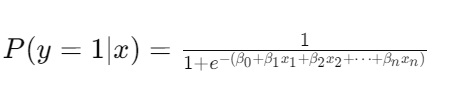

### this function here is not a straight line curve but instead a different kind of curve which is a "S" like shape

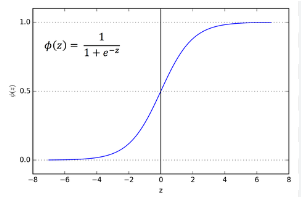